In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
import copy

In [ ]:
def negativize(x):
    if np.random.randint(1,101)>50:
        return x
    else:
        return -x

negativize=np.vectorize(negativize)
def relu(x):
    if x>0:
        return x
    else:
        return 0
relu=np.vectorize(relu)

def sigmoid(x):
  return (1 / (1 + np.exp(-x)))


In [ ]:
class NeuralNetwork:
    def __init__(self,shape=list()) -> None:
        self.weights=[]
        for i in range(len(shape)-1):
            self.weights.append(np.random.rand(shape[i],shape[i+1]))
        self.losses=[]
    def J(self,weights):
        #error function
        mse=0
        for i in range(len(self.x)):
            mse+=sum((self.forwardprop(weights,self.x[i])-self.y[i])**2)/len(self.x)/2
        return mse

    def forwardprop(self,weights,inp):
        for i in range(len(weights)):
            inp=relu(np.dot(inp,weights[i]))
        return inp

    def fit(self,x,y,epochs,lr):
        #training/back-propagation
        self.x=x
        self.y=y
        h=10**-6

        #calculating gradients
        for i in range(epochs):
            gradients=copy.deepcopy(self.weights)
            for l in range(len(self.weights)):
                for w in range(len(self.weights[l])):
                    weights=copy.deepcopy(self.weights)
                    weights[l][w]+=h
                    gradients[l][w]=lr*(self.J(weights)-self.J(self.weights))/h
                for l in range(len(self.weights)):
                    for w in range(len(self.weights[l])):
                        self.weights[l][w]=self.weights[l][w]-lr*gradients[l][w]
                      
            error=self.J(self.weights)
            self.losses.append(error)
            print(f"Epoch {i}: ",error)

        plt.plot(self.losses)
        plt.show

    def predict(self,X):
        y=[]
        for i in X:
            y.append(self.forwardprop(self.weights,i))
        return np.array(y)
        

In [ ]:
mms=MinMaxScaler()
x_test=pd.read_csv("/content/sample_data/california_housing_test.csv")
x_train=pd.read_csv("/content/sample_data/california_housing_train.csv")
y_train=x_train.pop("median_house_value")
y_test=x_test.pop("median_house_value")
x_train=mms.fit_transform(x_train)
x_test=mms.transform(x_test)
y_train, y_test = np.array(y_train).reshape(-1, 1), np.array(y_test).reshape(-1, 1)
#y_train=mms.fit_transform(y_train)
#y_test=mms.transform(y_test)
y_train=y_train/1000
y_test=y_test/1000
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
nn=NeuralNetwork([8,10,6,1])

Epoch 0:  17022.916495442
Epoch 1:  6697.096972963667
Epoch 2:  6199.527021379109
Epoch 3:  5930.8822339608705
Epoch 4:  5777.941415188753
Epoch 5:  5613.82499921123
Epoch 6:  5476.589104814735
Epoch 7:  5329.795454716528
Epoch 8:  5191.651929015406
Epoch 9:  5049.698299757028


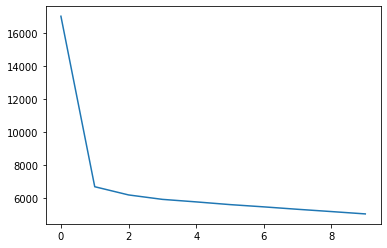

In [ ]:
nn.fit(x_train,y_train,10,0.01)